In [9]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from lxml import etree
import matplotlib.pyplot as plt
%matplotlib notebook

In [10]:
headers = {
    "user-agent": UserAgent().random
}
HIGH_DATA = []
LOW_DATA = []

In [11]:
def get_high_temperature(url):
    response = requests.get(url, headers=headers)
    text = response.content.decode("utf-8")
    soup = BeautifulSoup(text,'html5lib')
    conMidtab = soup.find('div',class_='conMidtab')
    tables = conMidtab.find_all('table')
    for table in tables:
        trs = table.find_all('tr')[2:]
        for index,tr in enumerate(trs):   # ebumerate能够取出对应的下标和值
            tds = tr.find_all('td')
            if index == 0:
                city_td = tds[1]
            else:
                city_td = tds[0]
            city = list(city_td.stripped_strings)[0]
            temp_td = tds[-5]
            max_temp = list(temp_td.stripped_strings)[0]
            HIGH_DATA.append({"city": city, 'high_temp': int(max_temp)})

def get_low_temperature(url):
    response = requests.get(url, headers=headers)
    text = response.text.encode('ISO-8859-1')
    trees = etree.HTML(text)
    citys = trees.xpath('//div[@class="hanml"]/div[1]//td[@width="83"][@height="23"]/a/text()')
    lows = trees.xpath('//div[@class="hanml"]/div[1]//td[@width="86"]/text()')
    while True:
        if '最低气温' not in lows:
            break
        else:
            lows.remove('最低气温')
    for i in zip(citys, lows):
        city, low = i
        LOW_DATA.append({"city": city, "low_temp": int(low)})
def draw_picture(LOW,HIGH):
    i = pd.DataFrame(LOW)
    j = pd.DataFrame(HIGH)
    # 分区域绘图subplot（行，列，第（）个）
    plt.subplot(2, 1, 1)
    # 逆序排序取前面十个然后放在ten_low中
    ten_low = i.sort_values(by="low_temp", ascending=True)[0:10]
    # 设置x和y轴的字体为黑体（SimHei）/解决轴不能显示字体的问题
    plt.rcParams['font.sans-serif'] = ['SimHei']
    # 解决不能显示负号的问题
    plt.rcParams['axes.unicode_minus'] = False
    # 取出ten_low中的城市和气温
    x1 = list(ten_low['city'])
    y1 = list(ten_low['low_temp'])
    # 画出bar图
    plt.bar(x1, y1)
    # 定义x和y轴的名称
    plt.xlabel('城市', fontproperties='SimHei')
    plt.ylabel("温度", fontproperties='SimHei')
    # 定义图表的名称
    plt.title("中国各个城市的今日温度最低前十名", fontproperties='SimHei')
    # 显示bar图上的数值
    for x, y in zip(x1, y1):
        plt.text(x, y, '%s' % y, ha='center', va='bottom')
    # 画出第二个子图
    plt.subplot(2, 1, 2)
    # 取出最低气温的后面十个数值
    ten_high = j.sort_values(by="high_temp", ascending=True)[-10:]
    x2 = list(ten_high['city'])
    y2 = list(ten_high['high_temp'])
    # plt.rcParams['font.sans-serif'] = ['SimHei']
    # plt.rcParams['axes.unicode_minus'] = False
    plt.bar(x2, y2)
    plt.xlabel('城市', fontproperties='SimHei')
    plt.ylabel("温度", fontproperties='SimHei')
    plt.title("中国各个城市的今日温度最高前十名", fontproperties='SimHei')
    for x, y in zip(x2, y2):
        plt.text(x, y, '%s' % y, ha='center', va='bottom')
    # 调整每隔子图之间的距离（默认）
    plt.tight_layout()
    plt.show()
        

<IPython.core.display.Javascript object>


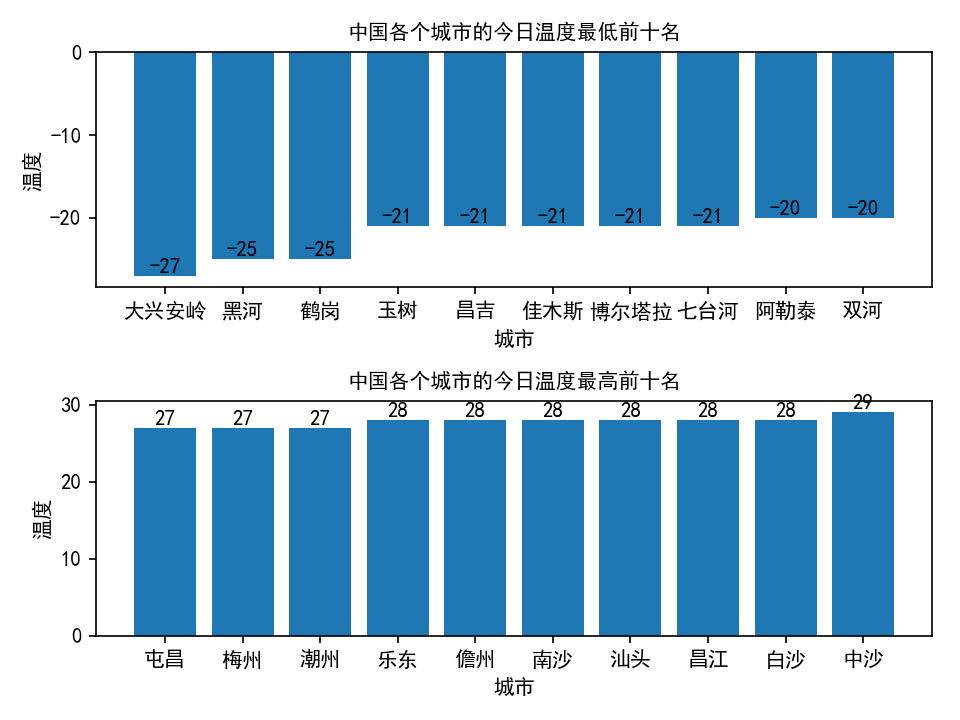

In [12]:
    zone = ['db', 'hb', 'hd', 'hz', 'hn', 'xb', 'xn', 'gat']
    for z in zone:
        url = "http://www.weather.com.cn/textFC/{}.shtml".format(z)
        get_high_temperature(url)
        get_low_temperature(url)
    draw_picture(LOW_DATA,HIGH_DATA)